# Visualize best model

## Overview

In this notebook, we select the best model from the ones built and trained with *build_model.ipynb*.
Then, we visualize and measure its performances. 

NB: I had troubles with loading the models. This notebook was not actually tested. 

## Requirements

In [1]:
!pip install scikit-plot

In [2]:
import pickle

from ModelSelector import ModelSelector
from ResultsVisualizer import ResultsVisualizer

## Get best model

In [3]:
model_selector = ModelSelector("models")
# model = model_selector.get_best_model()
# Because I had trouble with the pickle.load of the model, here I set a dummy model to run the code
!pip install git+https://github.com/apneal/classification_models.git@master
!pip install keras
import keras
from segmentation_models.models.unet_1d import Unet1D
model = Unet1D(backbone_name='resnet18_1d', input_shape = (None, 11))
model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=[
                    keras.metrics.BinaryAccuracy(),
                    keras.metrics.FalseNegatives()],
                )


dict_keys(['loss', 'binary_accuracy', 'false_negatives_7', 'val_loss', 'val_binary_accuracy', 'val_false_negatives_7'])
  Cloning https://github.com/apneal/classification_models.git (to revision master) to c:\users\camille\appdata\local\temp\pip-req-build-ihlzjft4
  Resolved https://github.com/apneal/classification_models.git to commit e39838a94c8729d6d5d42027c07b7f0328b915b1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/apneal/classification_models.git 'C:\Users\Camille\AppData\Local\Temp\pip-req-build-ihlzjft4'
  Running command git submodule update --init --recursive -q


Segmentation Models: using `tf.keras` framework.




## Visualize the model training

[0.76, 0.7651737928390503]


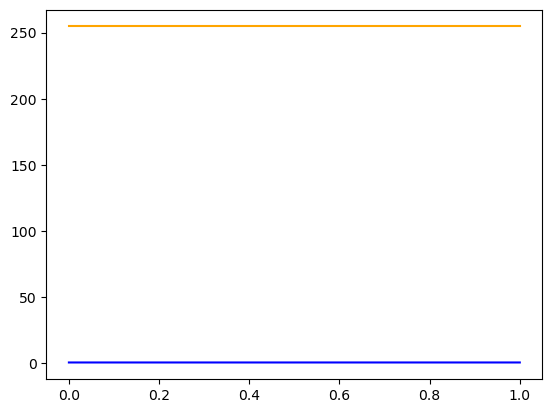

In [4]:
model_selector.plot_history(model_selector.get_best_model_index())

## Get model performance metrics 

### Load testing sets
So that we do not have to compute them all over again with DataLoader, 
we saved them in the *data* folder

In [5]:
with open("data/X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
    
with open("data/y_test.pkl", "rb") as f:
    y_test = pickle.load(f) 

### Get metrics with testing set

150/150 [==============================] - 17s 98ms/step
F1 score 0.0030883863582020572
Accuracy score 0.8777681145178197
Precision score 0.12118670720201279
Recall score 0.0015641236577762384


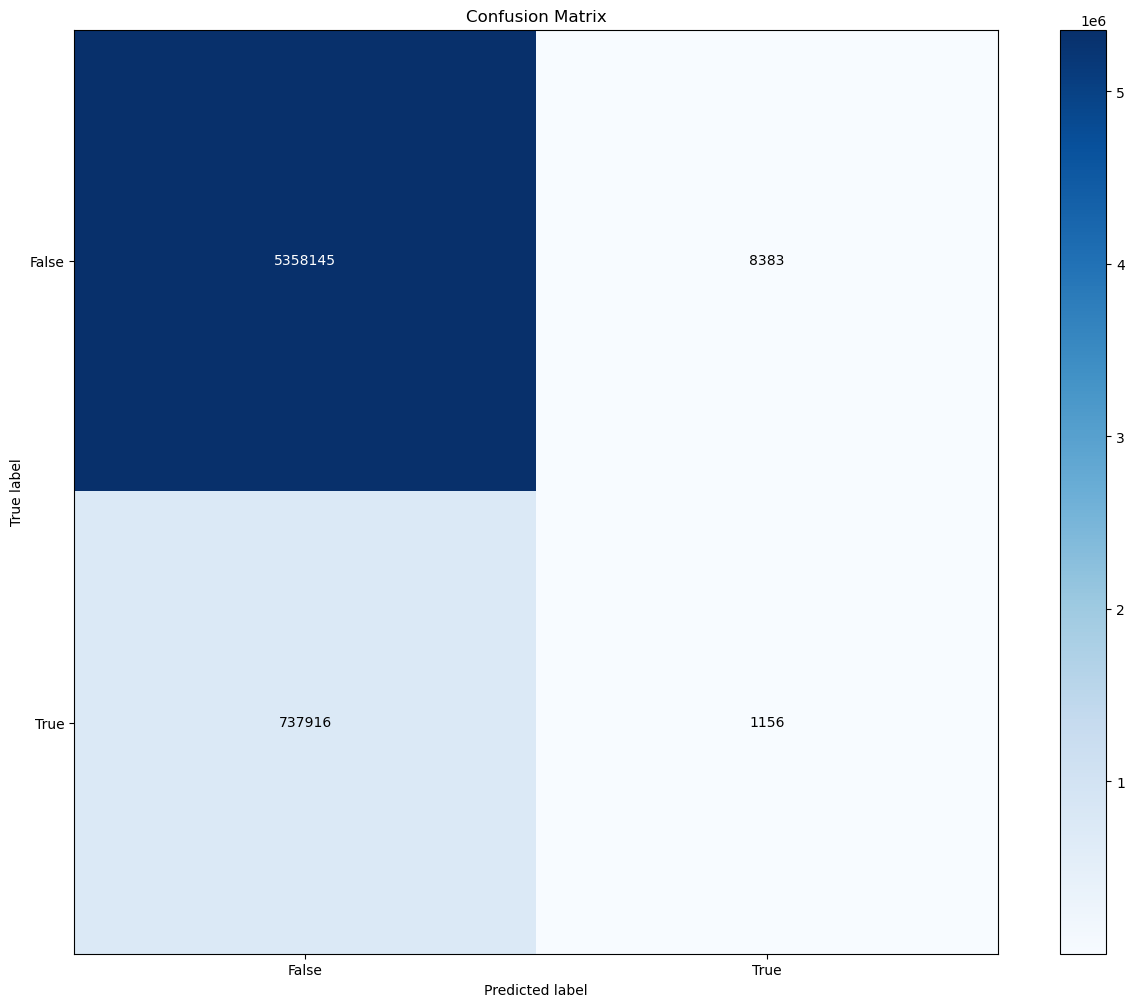

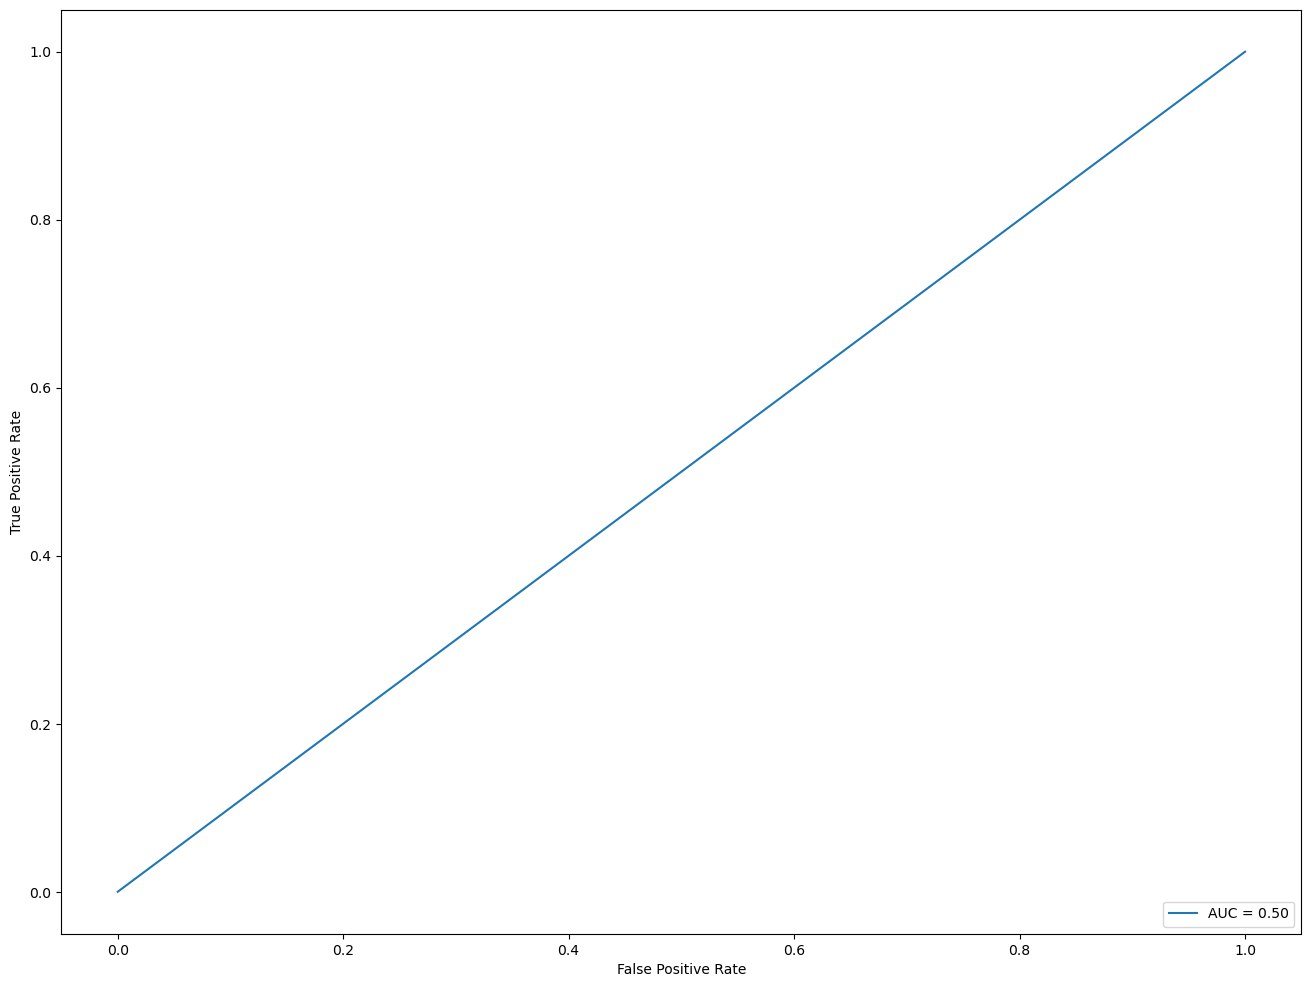

In [6]:
results_visualizer = ResultsVisualizer(model, X_test, y_test)

results_visualizer.compute_metrics()
results_visualizer.display_figures(save_folder = "results")

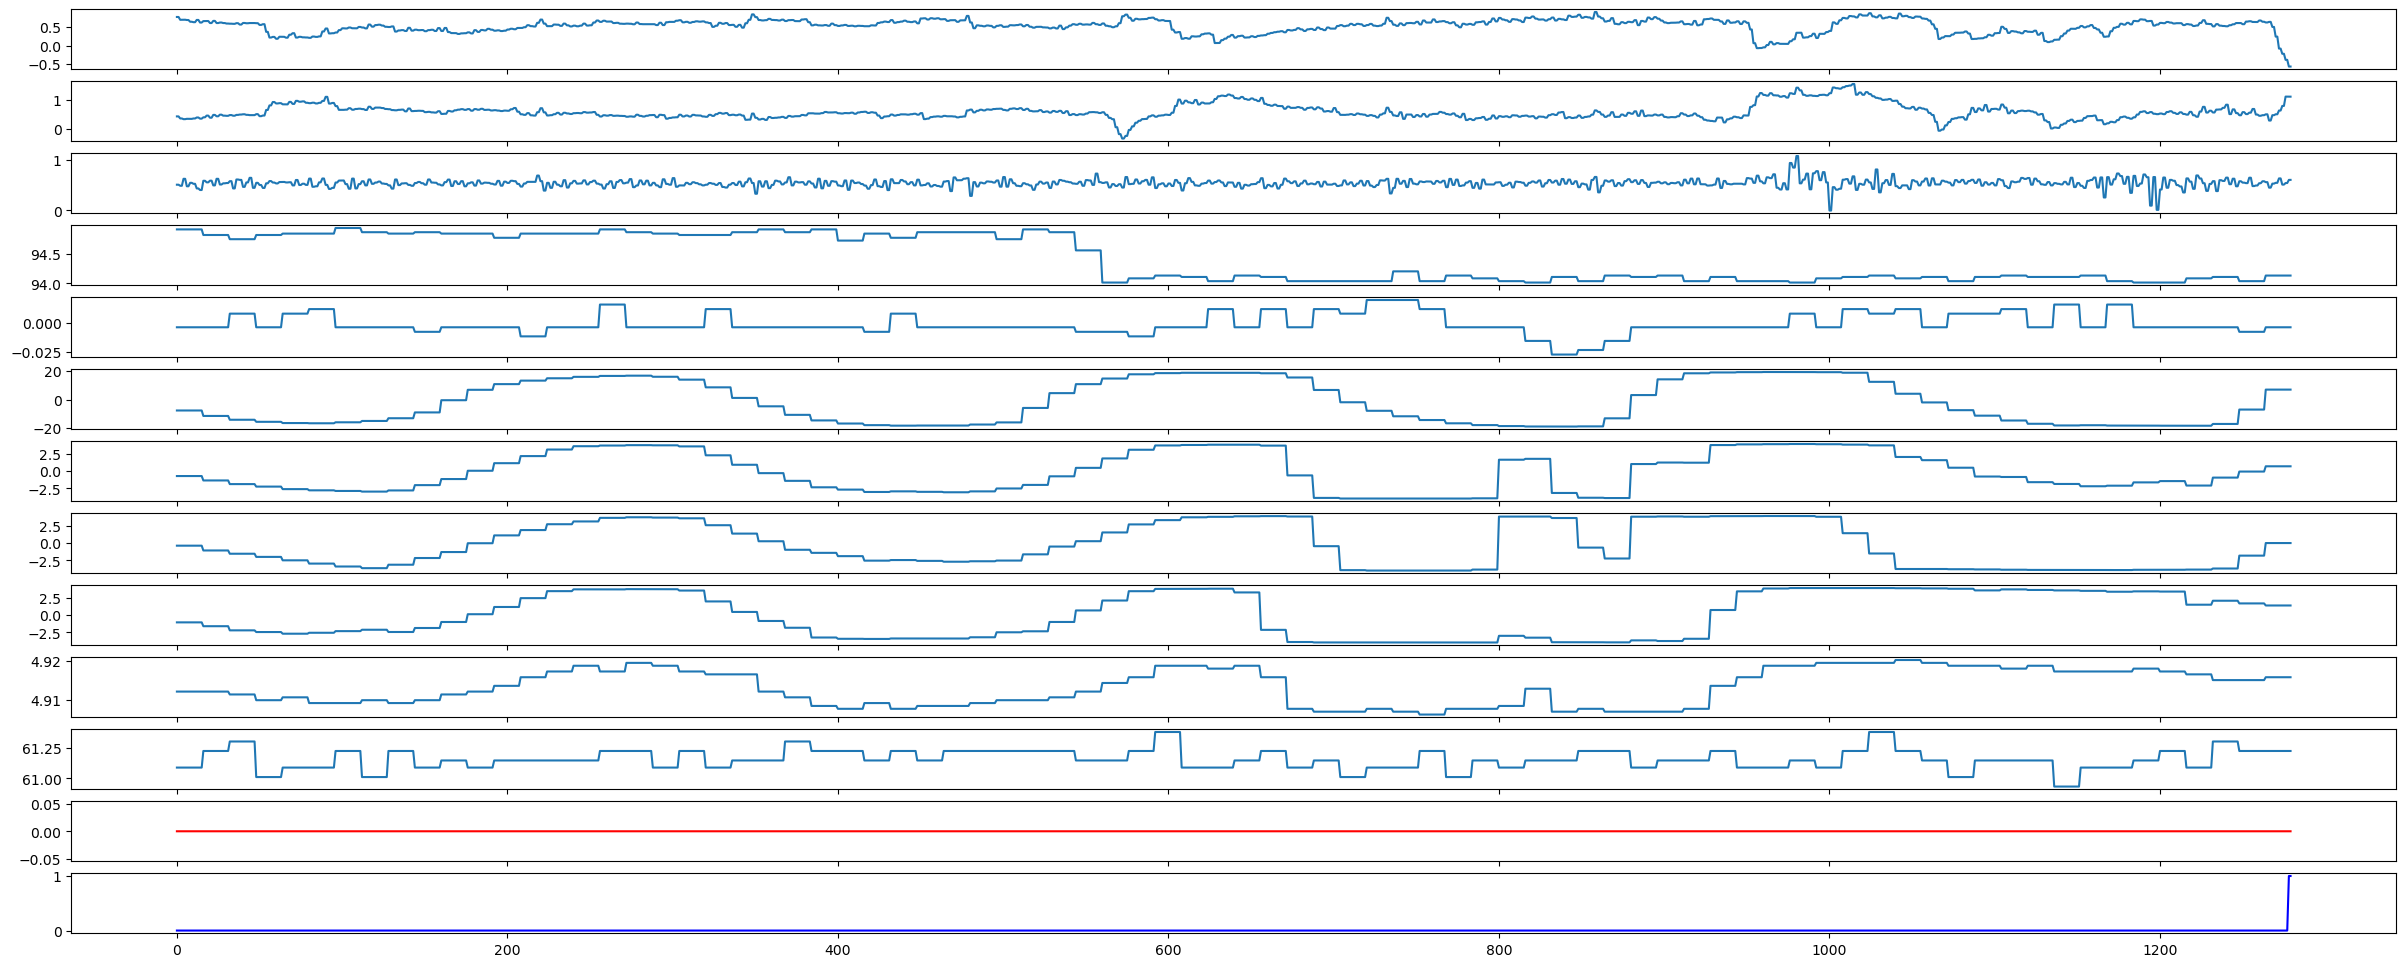

In [11]:
## Plot one row - indexed at 22, to better analyze what went wrong (or right)
## with the model
results_visualizer.plot_data(22)